# 6.1

In [911]:
import numpy as np
import scipy.optimize
import sympy
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy as sm

In [912]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    a=[[x1,x2],[x3,x4]]
    a=np.asarray(a)
    ans=(a.dot(a)).dot(a)
    f=[ans[0,0]-20,ans[0,1]-30,ans[1,0]-40,ans[1,1]-50]
    return f#np.asarray(f)

In [913]:
scipy.optimize.fsolve(f,[1,1,1,1], xtol = 1e-8)

array([0.27910912, 2.21544966, 2.95393288, 2.49455878])

# 6.2 and 6.3

In [914]:
def jacobian(f,x,counter):
    '''f is list of function\nx is list of points to calculate jacobian'''
    SumNrm=0
    eps = 1e-8
    N = len(f)
    J = np.zeros([N,N])
    for i in range(N):
        for j in range(N):
            x_plus = x.copy()
            x_minus = x.copy()
            x_plus[j] = x_plus[j] + eps
            x_minus[j] = x_minus[j] - eps
            J[i,j] = (f[i](*x_plus) - f[i](*x_minus))/eps * 0.5
            SumNrm=J[i,j]*J[i,j]+SumNrm
            counter=10*2+3+counter
    return J,counter,SumNrm**0.5

In [915]:
g=[]
g.append(lambda x1,x2,x3,x4: x1*(x1**2 + x2*x3) + x3*(x1*x2 + x2*x4) - 20)
g.append(lambda x1,x2,x3,x4: x2*(x1**2 + x2*x3) + x4*(x1*x2 + x2*x4) - 30)
g.append(lambda x1,x2,x3,x4: x1*(x1*x3 + x3*x4) + x3*(x2*x3 + x4**2) - 40)
g.append(lambda x1,x2,x3,x4: x2*(x1*x3 + x3*x4) + x4*(x2*x3 + x4**2) - 50)
g=np.asarray(g)
g

array([<function <lambda> at 0x000002FB9C23A598>,
       <function <lambda> at 0x000002FB9C23A158>,
       <function <lambda> at 0x000002FB9C23AB70>,
       <function <lambda> at 0x000002FB9C23AA60>], dtype=object)

In [916]:
def user_gaussian_solve_pp(a,b,counter):
    A = np.hstack((a,b))
    N = A.shape[0]
    for k in range(N-1):
        maxidx = np.abs(A[k:,k]).argmax() + k #get index of the max arg
        # +k is needed, because, argmax restart at 0 for the new slice
        counter=counter+1
        if k != maxidx:
            A[[k,maxidx]] = A[[maxidx, k]]
            counter=counter+1
        for i in range(k+1, N):
            r = -A[i,k] / A[k,k]
            counter=counter+1
            for j in range(k+1, N+1):
                A[i,j] = A[i,j] + r * A[k,j]
                counter=counter+2

    A[N-1,N] = A[N-1,-1] / A[N-1, -2]
    counter=counter+1
    for i in range(N-2, -1, -1): #2, 1, 0
        sum = 0
        for j in range(i+1, N): #i+1 to N-1
            sum = sum + A[i,j] * A[j,N]
            counter=counter+2
        A[i,N] = (A[i,N] - sum)/A[i,i]
        counter=counter+2
    return A[:,N][:,np.newaxis],counter

In [917]:
def newton_jacobian(f,x0,counter, print_option = False, print_option2 = True):
    """f is list of function, x is list of initial guess value"""
    Nmr=[]
    norm = 1
    maxitx = 100
    eps = 1e-8
    x = x0.copy()
    for k in range(maxitx):
        if print_option:
            print(x)
        jac_np,counter,aO = jacobian(f,x,counter)
        Nmr.append(aO)
        minus_f = np.array([- f[i](*x) for i in range(len(f))])[:,np.newaxis]
        delta_x_np,counter = user_gaussian_solve_pp(jac_np,minus_f,counter)
        if np.linalg.norm(delta_x_np) < eps:
            break
        x = [x[i] + delta_x_np.reshape((1,-1))[0].tolist()[i] for i in range(len(f))]
        counter=counter+len(f)
        
    if print_option2:
        print('number of iteration = ',k+1)
    return x,counter,Nmr

In [918]:

ans,counter,nrm = newton_jacobian(g,[1,1,1,1],0,print_option = True, print_option2 = True)
print("Number of floating operations= "+str(counter))
nrm

[1, 1, 1, 1]
[-1.4166664647807887, 3.583333137394692, 6.0833333672314716, 6.083333351354168]
[-0.7607557919444844, 2.6591254020458313, 4.304915837695552, 4.176614704621529]
[-0.19180752597778006, 2.274018020151097, 3.355601593506067, 3.052942754421318]
[0.19325993733144192, 2.2156298356774244, 3.0091873695167553, 2.573932550568837]
[0.277084340273137, 2.215613749269938, 2.9552931309884953, 2.4961224823524906]
[0.27910779545462766, 2.215450039903315, 2.9539338551194154, 2.4945592409350184]
[0.2791091211302162, 2.2154496583622354, 2.9539328778163454, 2.4945587794925483]
number of iteration =  8
Number of floating operations= 3517


[13.266499134354026,
 228.86097338298174,
 114.37983415998868,
 70.09439042742568,
 57.96767262169366,
 56.50845497925858,
 56.477061405642985,
 56.477047301030076]

# Double checking

In [919]:
[g[i](*ans) for i in range(len(g))]

[-4.444444812179427e-12,
 4.675371201301459e-12,
 6.66489086142974e-12,
 1.5489831639570184e-12]

In [920]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 6.4

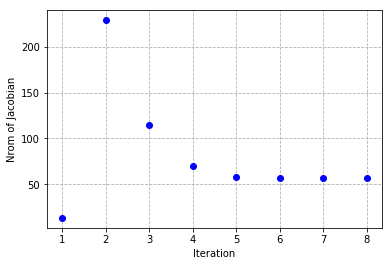

In [921]:
x=[1,2,3,4,5,6,7,8]
plt.plot(x, nrm,'ob')
plt.xlabel("Iteration")
plt.ylabel("Nrom of Jacobian")
plt.grid(linestyle='--')
plt.show()

# 6.5 

In [922]:
def jacobian(f,x,counter):
    '''f is list of function\nx is list of points to calculate jacobian'''
    SumNrm=0
    eps = 1e-8
    N = len(f)
    J = np.zeros([N,N])
    for i in range(N):
        for j in range(N):
            x_plus = x.copy()
            x_minus = x.copy()
            x_plus[j] = x_plus[j] + eps
            x_minus[j] = x_minus[j] - eps
            J[i,j] = (f[i](*x_plus) - f[i](*x_minus))/eps * 0.5
            SumNrm=J[i,j]*J[i,j]+SumNrm
            counter=10*2+3+counter
    return J,counter,SumNrm**0.5

In [923]:
def user_gaussian_solve_pp(a,b,counter):
    A = np.hstack((a,b))
    N = A.shape[0]
    for k in range(N-1):
        maxidx = np.abs(A[k:,k]).argmax() + k #get index of the max arg
        # +k is needed, because, argmax restart at 0 for the new slice
        counter=counter+1
        if k != maxidx:
            A[[k,maxidx]] = A[[maxidx, k]]
            counter=counter+1
        for i in range(k+1, N):
            r = -A[i,k] / A[k,k]
            counter=counter+1
            for j in range(k+1, N+1):
                A[i,j] = A[i,j] + r * A[k,j]
                counter=counter+2

    A[N-1,N] = A[N-1,-1] / A[N-1, -2]
    counter=counter+1
    for i in range(N-2, -1, -1): #2, 1, 0
        sum = 0
        for j in range(i+1, N): #i+1 to N-1
            sum = sum + A[i,j] * A[j,N]
            counter=counter+2
        A[i,N] = (A[i,N] - sum)/A[i,i]
        counter=counter+2
    return A[:,N][:,np.newaxis],counter

In [924]:
def newton_jacobian(f,x0,counter, print_option = False, print_option2 = True):
    """f is list of function, x is list of initial guess value"""
    xVal=[]
    norm = 1
    maxitx = 100
    eps = 1e-8
    x = x0.copy()
    for k in range(maxitx):
        if print_option:
            print(x)
        xVal.append(x)
        jac_np,counter,aO = jacobian(f,x,counter)
        minus_f = np.array([- f[i](*x) for i in range(len(f))])[:,np.newaxis]
        delta_x_np,counter = user_gaussian_solve_pp(jac_np,minus_f,counter)
        if np.linalg.norm(delta_x_np) < eps:
            break
        x = [x[i] + delta_x_np.reshape((1,-1))[0].tolist()[i] for i in range(len(f))]
        counter=counter+len(f)
        
    if print_option2:
        print('number of iteration = ',k+1)
    return x,counter,xVal

In [925]:

ans,counter,xVal = newton_jacobian(g,[1,1,1,1],0,print_option = True, print_option2 = True)
print("Number of floating operations= "+str(counter))

[1, 1, 1, 1]
[-1.4166664647807887, 3.583333137394692, 6.0833333672314716, 6.083333351354168]
[-0.7607557919444844, 2.6591254020458313, 4.304915837695552, 4.176614704621529]
[-0.19180752597778006, 2.274018020151097, 3.355601593506067, 3.052942754421318]
[0.19325993733144192, 2.2156298356774244, 3.0091873695167553, 2.573932550568837]
[0.277084340273137, 2.215613749269938, 2.9552931309884953, 2.4961224823524906]
[0.27910779545462766, 2.215450039903315, 2.9539338551194154, 2.4945592409350184]
[0.2791091211302162, 2.2154496583622354, 2.9539328778163454, 2.4945587794925483]
number of iteration =  8
Number of floating operations= 3517


In [926]:
NrmEr=np.asarray([[g[i](*xVal[j]) for i in range(4)] for j in range(8)])
ErrorMat=[np.linalg.norm(NrmEr[i]) for i in range(8)]

In [927]:
ErrorMat

[65.90902821313632,
 521.1870411006698,
 138.19723883932414,
 28.909899192777626,
 3.1857998836817876,
 0.0668743523165194,
 3.121827451073797e-05,
 9.403845202652989e-12]

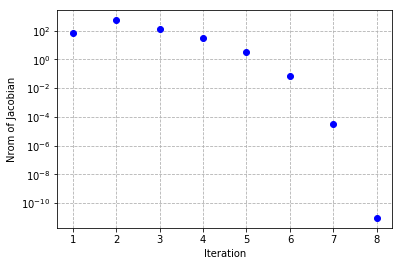

In [928]:
import pylab
import matplotlib.pyplot as plt
x=[1,2,3,4,5,6,7,8]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')
plt.plot(x, ErrorMat,'ob')
plt.xlabel("Iteration")
plt.ylabel("Nrom of Jacobian")
plt.grid(linestyle='--')
plt.show()

# 6.6

In [929]:
h=[]
h.append(lambda x1,x2,x3,x4: x1*x1**2 + x2*x3**2 + x3*x1*x2 + x2*x4+12)
h.append(lambda x1,x2,x3,x4: x2*2 + x3/x1 + x4*(x1*x2 + x2*x4)-10)
h.append(lambda x1,x2,x3,x4: x1*x1+x3 + x3*x4 + x3*x2 + x4**3)
h.append(lambda x1,x2,x3,x4: x2*x3+x1 + x3*x4 + x4*x2*x3 + x4**2-5)
h=np.asarray(h)

In [930]:
ans,counter,xVal = newton_jacobian(h,[1,1,1,1],0,print_option = False, print_option2 = True)
[h[i](*ans) for i in range(len(h))]

number of iteration =  12


[5.274337411265151e-09,
 -5.507025946371868e-10,
 1.0590373022978383e-09,
 7.469580509678053e-13]

In [931]:
NrmEr=np.asarray([[h[i](*xVal[j]) for i in range(4)] for j in range(12)])
ErrorMat=[np.linalg.norm(NrmEr[i]) for i in range(12)]
ErrorMat

[17.4928556845359,
 39.88379372217704,
 369.2029701155504,
 19.250246082733963,
 53.23962978673537,
 24.398912827254478,
 36.18486821271849,
 19.66045257425969,
 0.7411782815513426,
 0.3377725801960061,
 0.0005469826229413101,
 5.4077230921355354e-09]

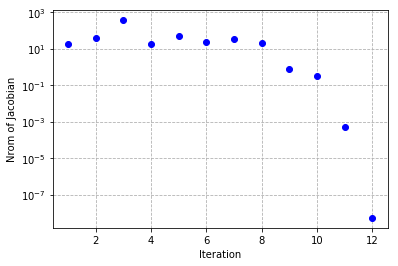

In [932]:
import pylab
import matplotlib.pyplot as plt
x=[1,2,3,4,5,6,7,8,9,10,11,12]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')
plt.plot(x, ErrorMat,'ob')
plt.xlabel("Iteration")
plt.ylabel("Nrom of Jacobian")
plt.grid(linestyle='--')
plt.show()

In [933]:
def funcUse(x):
    x1=x[0]
    x2=x[1]
    x3=x[2]
    x4=x[3]
    h=[]
    h.append(x1*x1**2 + x2*x3**2 + x3*x1*x2 + x2*x4+12)
    h.append(x2*2 + x3/x1 + x4*(x1*x2 + x2*x4)-10)
    h.append(x1*x1+x3 + x3*x4 + x3*x2 + x4**3)
    h.append(x2*x3+x1 + x3*x4 + x4*x2*x3 + x4**2-5)
    h=np.asarray(h)
    return h



In [934]:
funcUse([1,1,1,1])

array([16., -5.,  5.,  0.])

In [935]:
scipy.optimize.fsolve(funcUse,[1,1,1,1], xtol = 1e-8)

C:\Users\aryas\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


array([ 0.01040878, -2.58870631,  0.22823464,  1.47767855])

In [936]:
scipy.optimize.fsolve(funcUse,[4,6,2,-1], xtol = 1e-8)

array([ 4.01143799, -7.59871643,  1.89630455, -1.12873095])

In [937]:
ans

[4.011437989787023,
 -7.5987164305669435,
 1.896304552722652,
 -1.1287309479851872]

The Scipy function did not give correct answer with all initial guesses. I had to choose intiall guess values close to the acutal answers!!!!!!

In [938]:
x1, x2, x3, x4 = sympy.symbols('x1, x2, x3, x4')
h=[]
h.append( x1*x1**2 + x2*x3**2 + x3*x1*x2 + x2*x4+12)
h.append(x2*2 + x3/x1 + x4*(x1*x2 + x2*x4)-10)
h.append(x1*x1+x3 + x3*x4 + x3*x2 + x4**3)
h.append(x2*x3+x1 + x3*x4 + x4*x2*x3 + x4**2-5)
h=np.asarray(h)

In [939]:
A_mat_sym = sympy.Matrix([h[0],h[1],h[2],h[3]])
y_mat_sym = sympy.Matrix([x1,x2,x3,x4])
jac_sym = A_mat_sym.jacobian(y_mat_sym)
jac_sym

Matrix([
[ 3*x1**2 + x2*x3, x1*x3 + x3**2 + x4, x1*x2 + 2*x2*x3,                x2],
[x2*x4 - x3/x1**2,   x4*(x1 + x4) + 2,            1/x1,   x1*x2 + 2*x2*x4],
[            2*x1,                 x3,     x2 + x4 + 1,      x3 + 3*x4**2],
[               1,         x3*x4 + x3, x2*x4 + x2 + x4, x2*x3 + x3 + 2*x4]])

In [940]:
jac_sym.subs({x1:1,x2:1,x3:1,x4:1})

Matrix([
[4, 3, 3, 1],
[0, 4, 1, 3],
[2, 1, 3, 4],
[1, 2, 3, 4]])

In [941]:
h=[]
h.append(lambda x1,x2,x3,x4: x1*x1**2 + x2*x3**2 + x3*x1*x2 + x2*x4+12)
h.append(lambda x1,x2,x3,x4: x2*2 + x3/x1 + x4*(x1*x2 + x2*x4)-10)
h.append(lambda x1,x2,x3,x4: x1*x1+x3 + x3*x4 + x3*x2 + x4**3)
h.append(lambda x1,x2,x3,x4: x2*x3+x1 + x3*x4 + x4*x2*x3 + x4**2-5)
h=np.asarray(h)
a,b,c=jacobian(h,[1,1,1,1],0)
a

array([[3.99999998, 2.99999989, 2.99999989, 1.00000008],
       [0.        , 3.99999998, 0.99999999, 2.99999998],
       [1.99999999, 0.99999999, 2.99999998, 3.99999998],
       [0.99999999, 1.99999999, 2.99999998, 3.99999998]])

# 6.7

In [942]:
X=np.asarray([[1, i] for i in range(8)], dtype='float')

In [943]:
from scipy.linalg import solve
A=X.T.dot(X)
y=np.array([100+i*2 for i in range(8)], dtype='float')
b=X.T.dot(y)
Ans=solve(A,b)
[a0,a1]=[Ans[0], Ans[1]]
print('a0='+str(a0))
print('a1='+str(a1))

a0=100.00000000000001
a1=1.9999999999999962


In [944]:
X2=np.asarray([i**2 for i in range(8)], dtype='float')
X2=X2[:,np.newaxis]



In [945]:
X=np.asarray([[1, i] for i in range(8)], dtype='float')
y=y[:,np.newaxis]
X=np.hstack((X,X2))
A=X.T.dot(X)
b=X.T.dot(y)
Ans=solve(A,b)
[a0,a1,a2]=[Ans[0], Ans[1],Ans[2]]
print('a0='+str(a0))
print('a1='+str(a1))
print('a2='+str(a2))

a0=[100.]
a1=[2.]
a2=[-8.83737528e-15]


In [946]:
#New sets of data to see if I could match the second degree polynomila or no!.
#I checked the data and ther were correct :) 
X=np.asarray([[1, i] for i in range(8)], dtype='float')
X2=np.asarray([i**2 for i in range(8)], dtype='float')
X2=X2[:,np.newaxis]
X=np.hstack((X,X2))
A=X.T.dot(X)
y=np.array([12*i**2-6*i+20 for i in range(8)], dtype='float')
b=X.T.dot(y)
Ans=solve(A,b)
[a0,a1,a2]=[Ans[0], Ans[1],Ans[2]]
print('a0='+str(a0))
print('a1='+str(a1))
print('a2='+str(a2))

a0=19.99999999999988
a1=-5.999999999999904
a2=11.999999999999988
